# Download the buildings data

### Request the ohsome API

Question: How many buildings were mapped with RapID (Microsoft buildings) in every continent?

#### Import libs

In [1]:
import json
import os
import requests
import re

### Get the data for every specified region

#### Define the url

In [2]:
base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
url = base_url + endpoint

#### Define the function to generate the data

In [3]:
def data_gen(name):

    with open(f"{geojson_dir}{name}", "r") as file:
        bpolys = json.load(file)


    parameters = {
        "bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
        "filter": "building=* and building!=no and geometry:polygon",
        "groupByKey": "source",
        "groupByValues": "microsoft/BuildingFootprints",
        "format": "json",
        "time": "2018-01-01/2023-01-01/P1Y",
    }
    headers = {
        "accept": "application/json",
        "Content-Type": "application/x-www-form-urlencoded",
    }

    for value in parameters.values():
        assert value != "", "Please provide values for the parameters"

    response = requests.post(url, data=parameters, headers=headers)
    response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

    print("Response:")
    print(json.dumps(response.json(), indent=4))  # Pretty print response

    result = response.json()["groupByResult"]
    return result


#### Get the names of regions/geojson files

In [2]:
os.chdir('..')
home_dir = os.getcwd()
geojson_dir = os.path.join(home_dir, "geojson-africa-states", "")

geojson_names = []
for (dir_path, dir_names, file_names) in os.walk(geojson_dir):  # give the path
    geojson_names.extend(file_names)
print(geojson_names)
print(os.getcwd())


['0_Burundi.geojson', '10_Djibouti.geojson', '11_Algeria.geojson', '12_Egypt.geojson', '13_Gabon.geojson', '14_Eritrea.geojson', '15_Ghana.geojson', '16_Ethiopia.geojson', '17_Guinea.geojson', '18_Gambia.geojson', '19_Guinea Bissau.geojson', '1_Benin.geojson', '20_Morocco.geojson', '21_Liberia.geojson', '22_Lesotho.geojson', '23_Equatorial Guinea.geojson', '24_Libya.geojson', '25_Madagascar.geojson', '26_Kenya.geojson', '27_Mozambique.geojson', '28_Mauritania.geojson', '29_Niger.geojson', '2_Burkina Faso.geojson', '30_Rwanda.geojson', '31_Western Sahara.geojson', '32_Nigeria.geojson', '33_Sudan.geojson', '34_Malawi.geojson', '35_Namibia.geojson', '36_Senegal.geojson', '37_South Sudan.geojson', '38_Mali.geojson', '39_Somaliland.geojson', '3_Ivory Coast.geojson', '40_Swaziland.geojson', '41_Chad.geojson', '42_Somalia.geojson', '43_Sierra Leone.geojson', '44_Togo.geojson', '45_Tunisia.geojson', '46_Uganda.geojson', '47_United Republic of Tanzania.geojson', '48_South Africa.geojson', '49_Z

In [33]:
geojson_names.sort()
geojson_names

['0_Burundi.geojson',
 '10_Djibouti.geojson',
 '11_Algeria.geojson',
 '12_Egypt.geojson',
 '13_Gabon.geojson',
 '14_Eritrea.geojson',
 '15_Ghana.geojson',
 '16_Ethiopia.geojson',
 '17_Guinea.geojson',
 '18_Gambia.geojson',
 '19_Guinea Bissau.geojson',
 '1_Benin.geojson',
 '20_Morocco.geojson',
 '21_Liberia.geojson',
 '22_Lesotho.geojson',
 '23_Equatorial Guinea.geojson',
 '24_Libya.geojson',
 '25_Madagascar.geojson',
 '26_Kenya.geojson',
 '27_Mozambique.geojson',
 '28_Mauritania.geojson',
 '29_Niger.geojson',
 '2_Burkina Faso.geojson',
 '30_Rwanda.geojson',
 '31_Western Sahara.geojson',
 '32_Nigeria.geojson',
 '33_Sudan.geojson',
 '34_Malawi.geojson',
 '35_Namibia.geojson',
 '36_Senegal.geojson',
 '37_South Sudan.geojson',
 '38_Mali.geojson',
 '39_Somaliland.geojson',
 '3_Ivory Coast.geojson',
 '40_Swaziland.geojson',
 '41_Chad.geojson',
 '42_Somalia.geojson',
 '43_Sierra Leone.geojson',
 '44_Togo.geojson',
 '45_Tunisia.geojson',
 '46_Uganda.geojson',
 '47_United Republic of Tanzania.g

{'0': 'Burundi',
 '10': 'Djibouti',
 '11': 'Algeria',
 '12': 'Egypt',
 '13': 'Gabon',
 '14': 'Eritrea',
 '15': 'Ghana',
 '16': 'Ethiopia',
 '17': 'Guinea',
 '18': 'Gambia',
 '19': 'Guinea Bissau',
 '1': 'Benin',
 '20': 'Morocco',
 '21': 'Liberia',
 '22': 'Lesotho',
 '23': 'Equatorial Guinea',
 '24': 'Libya',
 '25': 'Madagascar',
 '26': 'Kenya',
 '27': 'Mozambique',
 '28': 'Mauritania',
 '29': 'Niger',
 '2': 'Burkina Faso',
 '30': 'Rwanda',
 '31': 'Western Sahara',
 '32': 'Nigeria',
 '33': 'Sudan',
 '34': 'Malawi',
 '35': 'Namibia',
 '36': 'Senegal',
 '37': 'South Sudan',
 '38': 'Mali',
 '39': 'Somaliland',
 '3': 'Ivory Coast',
 '40': 'Swaziland',
 '41': 'Chad',
 '42': 'Somalia',
 '43': 'Sierra Leone',
 '44': 'Togo',
 '45': 'Tunisia',
 '46': 'Uganda',
 '47': 'United Republic of Tanzania',
 '48': 'South Africa',
 '49': 'Zambia',
 '4': 'Democratic Republic of the Congo',
 '50': 'Zimbabwe',
 '5': 'Angola',
 '6': 'Botswana',
 '7': 'Cameroon',
 '8': 'Republic of Congo',
 '9': 'Central Africa

#### Get the required data by the geojson files (not overhelm the server)

In [5]:
os.chdir(geojson_dir) # change the working directory because of geojson files

data = []

for geojson_name in geojson_names:

    data.append(data_gen(geojson_name))

os.chdir(home_dir)  # change the working directory back to the home directory


Response:
{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "groupByResult": [
        {
            "groupByObject": [
                11,
                "remainder"
            ],
            "result": [
                {
                    "timestamp": "2018-01-01T00:00:00Z",
                    "value": 259546.0
                },
                {
                    "timestamp": "2019-01-01T00:00:00Z",
                    "value": 363907.0
                },
                {
                    "timestamp": "2020-01-01T00:00:00Z",
                    "value": 401339.0
                },
                {
                    "timestamp": "2021-01-01T00:00:00Z",
                    "value": 426008.0
                },
                {
                    "timestamp": "2022-01-01T00:00:00Z",
                    "value": 535272.0
                },
                {
    

KeyboardInterrupt: 

In [2]:
downloaded_data = r"downloaded-data"
with open(f"{downloaded_data}\blds_continents_data_18-23_ai.json", "w") as file:
    json.dump(data, file, indent=4)

# Save the json data and load (this is in different notebook – see plot-figure1.ipynb)

In [2]:
with open("continents_data_20-23_ai.json", "r") as f:
    data = json.load(f)
data


[[{'groupByObject': [0, 'remainder'],
   'result': [{'timestamp': '2020-01-01T00:00:00Z', 'value': 54298403.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 67423672.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 80187816.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 92934713.0}]},
  {'groupByObject': [0, 'source=microsoft/BuildingFootprints'],
   'result': [{'timestamp': '2020-01-01T00:00:00Z', 'value': 0.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 219212.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 269849.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 2598077.0}]}],
 [{'groupByObject': [6, 'remainder'],
   'result': [{'timestamp': '2020-01-01T00:00:00Z', 'value': 774.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 815.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 1011.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 1054.0}]},
  {'groupByObject': [6, 'source=microsoft/BuildingFootprints'],
   'result': [{'times

#### Edit the obtained data into desired shape to create a DataFrame

In [3]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [4]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
df

,feature,source,timestamp,value
0,0,remainder,2020-01-01T00:00:00Z,54298403.0
1,0,remainder,2021-01-01T00:00:00Z,67423672.0
2,0,remainder,2022-01-01T00:00:00Z,80187816.0
3,0,remainder,2023-01-01T00:00:00Z,92934713.0
4,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0
...,...,...,...,...
59,5,remainder,2023-01-01T00:00:00Z,15766540.0
60,5,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0
61,5,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0
62,5,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,12590.0


In [5]:
# Export the data to excel
# df.to_excel("example.xlsx", index=False)

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

## Plot the results

#### Data preparation and filtering

In [7]:
# labels for graph legend
labels_dic = {0:"Africa",
            1:"Asia",
            2:"Australia",
            3:"North America",
            4:"Oceania",
            5:"South America",
            6:"Antarctica",
            7:"Europe",
            }
ser_labels = pd.Series(labels_dic, name="continent" )
# print(ser_labels)

df_labels = pd.DataFrame({"continent": ser_labels, "id": range(len(ser_labels))})
print(df_labels)

df = df.merge(df_labels, how="left", left_on="feature", right_on="id")
df

       continent  id
0         Africa   0
1           Asia   1
2      Australia   2
3  North America   3
4        Oceania   4
5  South America   5
6     Antarctica   6
7         Europe   7


,feature,source,timestamp,value,continent,id
0,0,remainder,2020-01-01 00:00:00+00:00,54298403.0,Africa,0
1,0,remainder,2021-01-01 00:00:00+00:00,67423672.0,Africa,0
2,0,remainder,2022-01-01 00:00:00+00:00,80187816.0,Africa,0
3,0,remainder,2023-01-01 00:00:00+00:00,92934713.0,Africa,0
4,0,source=microsoft/BuildingFootprints,2020-01-01 00:00:00+00:00,0.0,Africa,0
...,...,...,...,...,...,...
59,5,remainder,2023-01-01 00:00:00+00:00,15766540.0,South America,5
60,5,source=microsoft/BuildingFootprints,2020-01-01 00:00:00+00:00,0.0,South America,5
61,5,source=microsoft/BuildingFootprints,2021-01-01 00:00:00+00:00,0.0,South America,5
62,5,source=microsoft/BuildingFootprints,2022-01-01 00:00:00+00:00,12590.0,South America,5


In [8]:
# grouped = df.groupby(["feature", "timestamp"])["value"].sum()
grouped = df.groupby(["source","timestamp"])["value"].sum()
grouped


source                               timestamp                
remainder                            2020-01-01 00:00:00+00:00    364680591.0
                                     2021-01-01 00:00:00+00:00    418092103.0
                                     2022-01-01 00:00:00+00:00    472865820.0
                                     2023-01-01 00:00:00+00:00    517941468.0
source=microsoft/BuildingFootprints  2020-01-01 00:00:00+00:00        13935.0
                                     2021-01-01 00:00:00+00:00      2530556.0
                                     2022-01-01 00:00:00+00:00      5859157.0
                                     2023-01-01 00:00:00+00:00     12412360.0
Name: value, dtype: float64

In [9]:

# merged_data = df.merge(grouped, on=['timestamp', 'feature'], how='left', )
merged_data = df.merge(grouped, on=["source", 'timestamp'], how='left', )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
merged_data.head(10)


,feature,source,timestamp,num_of_blds,continent,id,total_blds,percentage
0,0,remainder,2020-01-01 00:00:00+00:00,54298403.0,Africa,0,364680591.0,14.889304
1,0,remainder,2021-01-01 00:00:00+00:00,67423672.0,Africa,0,418092103.0,16.126512
2,0,remainder,2022-01-01 00:00:00+00:00,80187816.0,Africa,0,472865820.0,16.957837
3,0,remainder,2023-01-01 00:00:00+00:00,92934713.0,Africa,0,517941468.0,17.943092
4,0,source=microsoft/BuildingFootprints,2020-01-01 00:00:00+00:00,0.0,Africa,0,13935.0,0.000000
5,0,source=microsoft/BuildingFootprints,2021-01-01 00:00:00+00:00,219212.0,Africa,0,2530556.0,8.662602
6,0,source=microsoft/BuildingFootprints,2022-01-01 00:00:00+00:00,269849.0,Africa,0,5859157.0,4.605594
7,0,source=microsoft/BuildingFootprints,2023-01-01 00:00:00+00:00,2598077.0,Africa,0,12412360.0,20.931370
8,6,remainder,2020-01-01 00:00:00+00:00,774.0,Antarctica,6,364680591.0,0.000212
9,6,remainder,2021-01-01 00:00:00+00:00,815.0,Antarctica,6,418092103.0,0.000195


In [10]:
# percentage verification
merged_data.groupby(["source", "timestamp"])["percentage"].sum()

source                               timestamp                
remainder                            2020-01-01 00:00:00+00:00    100.0
                                     2021-01-01 00:00:00+00:00    100.0
                                     2022-01-01 00:00:00+00:00    100.0
                                     2023-01-01 00:00:00+00:00    100.0
source=microsoft/BuildingFootprints  2020-01-01 00:00:00+00:00    100.0
                                     2021-01-01 00:00:00+00:00    100.0
                                     2022-01-01 00:00:00+00:00    100.0
                                     2023-01-01 00:00:00+00:00    100.0
Name: percentage, dtype: float64

In [55]:
df_ai = merged_data.loc[(df["source"] == "source=microsoft/BuildingFootprints") , :] # buiildings used from Microsoft AI
# df_ai #& (df["feature"] == 5)
df_rem = merged_data.loc[(df["source"] == "remainder"),:] # remainder = manually mapped buildings
df_rem.head()


,feature,source,timestamp,num_of_blds,continent,id,total_blds,percentage
0,0,remainder,2020-01-01 00:00:00+00:00,54298403.0,Africa,0,364680591.0,14.889304
1,0,remainder,2021-01-01 00:00:00+00:00,67423672.0,Africa,0,418092103.0,16.126512
2,0,remainder,2022-01-01 00:00:00+00:00,80187816.0,Africa,0,472865820.0,16.957837
3,0,remainder,2023-01-01 00:00:00+00:00,92934713.0,Africa,0,517941468.0,17.943092
8,6,remainder,2020-01-01 00:00:00+00:00,774.0,Antarctica,6,364680591.0,0.000212


In [12]:
df_rem_piv = df_ai.pivot_table(index="timestamp", columns="feature", values="percentage")
df_rem_piv.columns


Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='feature')

#### Plots

In [13]:
def fill_under_lines(*argv, alpha=.2, **kwargs):
    for ax in argv:
        if ax is None:
            ax = plt.gca()
        for line in ax.lines:
            x, y = line.get_xydata().T
            ax.fill_between(x, 0, y, color=line.get_color(), alpha=alpha, **kwargs)

Text(0, 0.5, 'Number of buildings [%]')

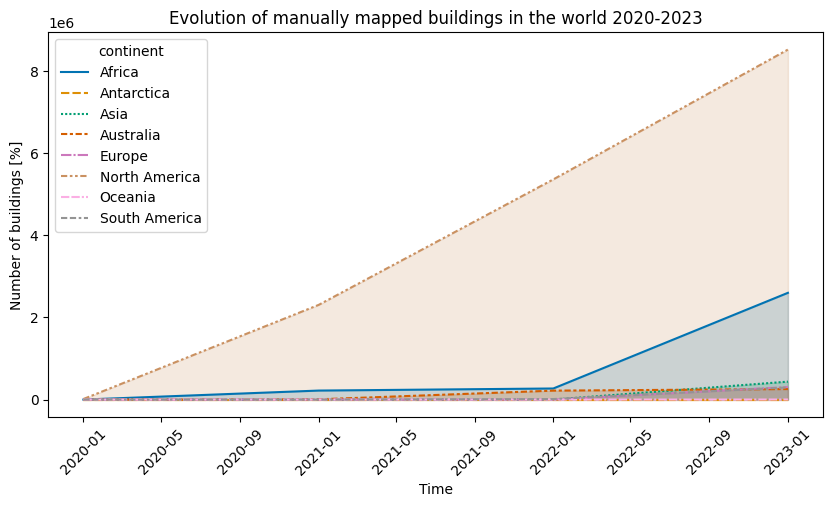

In [61]:
# without dictionary labels

plt.figure(figsize=(10, 5))
plt.title("Evolution of manually mapped buildings in the world 2020-2023")

# plot the data
ax = sns.lineplot(x='timestamp', y='num_of_blds', hue='continent', data=df_ai,
             palette='colorblind',  style='continent',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Time")
plt.ylabel("Number of buildings [%]")


Text(0, 0.5, 'Number of buildings [%]')

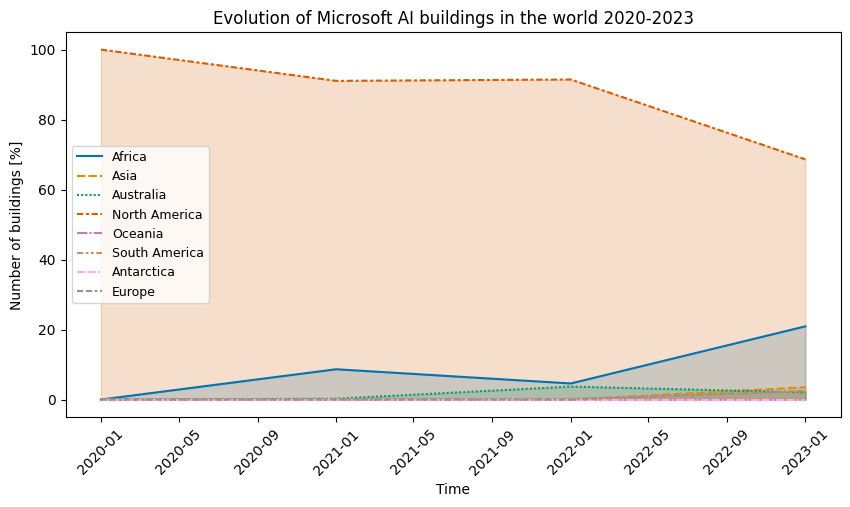

In [42]:
# with dictionary keys

plt.figure(figsize=(10,5))
plt.title("Evolution of Microsoft AI buildings in the world 2020-2023")

# plot the data
ax = sns.lineplot(x='timestamp', y='percentage', hue='feature', data=df_ai,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
plt.ylim(top=105)

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=9)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Time")
plt.ylabel("Number of buildings [%]")


In [50]:
# 100 % area plot try
# plt.stackplot(range(1, 5), df_rem_piv[0], df_rem_piv[1], df_rem_piv[2],
#                 df_rem_piv[3], df_rem_piv[4], df_rem_piv[5], df_rem_piv[6], df_rem_piv[7])
# plt.show()

# df_rem_piv[0], df_rem_piv[1], df_rem_piv[2], df_rem_piv[3], df_rem_piv[4], df_rem_piv[5], df_rem_piv[6], df_rem_piv[7]


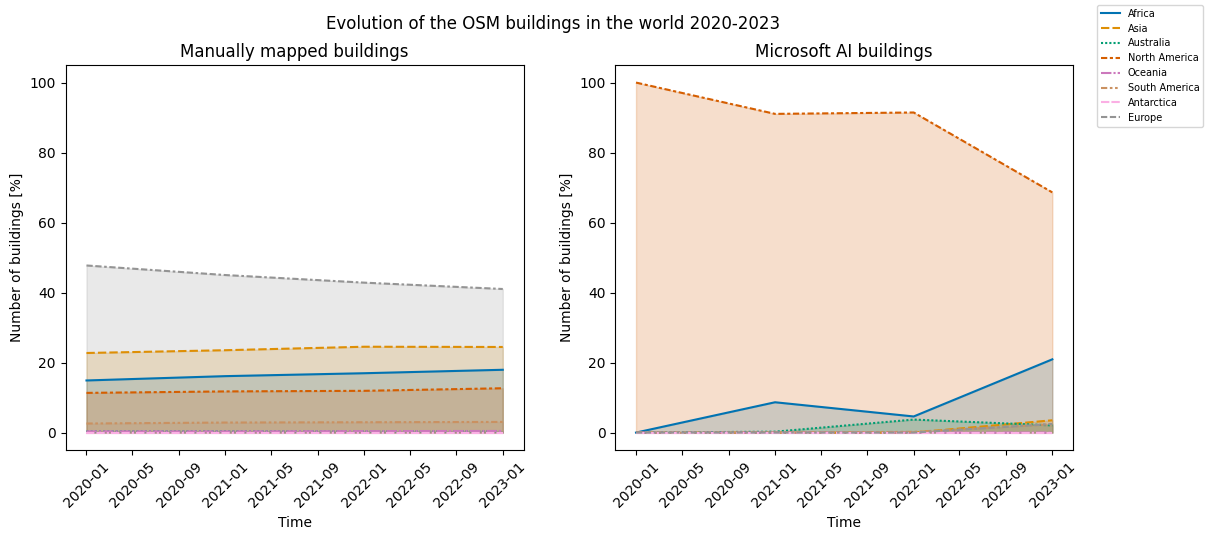

In [53]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))
fig.suptitle("Evolution of the OSM buildings in the world 2020-2023")

# create a Seaborn plot on the first subplot
sns.lineplot(x='timestamp', y='percentage', hue='feature', data=df_rem, ax=ax1,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())

# create another Seaborn plot on the second subplot
sns.lineplot(x='timestamp', y='percentage', hue='feature', data=df_ai, ax=ax2,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
ax2.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=7)
ax1.legend().remove()
ax2.legend().remove()

# ax1.set_yscale("log")
# ax2.set_yscale("log")

# set titles for each subplot
ax1.set_title("Manually mapped buildings")
ax2.set_title("Microsoft AI buildings")

# set the y axis limit
ax1.set_ylim(top=105, bottom=-5)
ax2.set_ylim(top=105, bottom=-5)

# set the y axis label
ax1.set_xlabel("Time")
ax1.set_ylabel("Number of buildings [%]")

# set the x axis label
ax2.set_xlabel("Time")
ax2.set_ylabel("Number of buildings [%]")

# fill the area under lines
fill_under_lines(ax1,ax2)

# rotate x-axis labels for both subplots
for ax in [ax1, ax2]:
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelrotation=45)

fig.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=7)

plt.show()


In [26]:
df_rem.head()

,feature,source,timestamp,num_of_blds,continent,id,total_blds,percentage
0,0,remainder,2020-01-01 00:00:00+00:00,54298403.0,Africa,0,364680591.0,14.889304
1,0,remainder,2021-01-01 00:00:00+00:00,67423672.0,Africa,0,418092103.0,16.126512
2,0,remainder,2022-01-01 00:00:00+00:00,80187816.0,Africa,0,472865820.0,16.957837
3,0,remainder,2023-01-01 00:00:00+00:00,92934713.0,Africa,0,517941468.0,17.943092
8,6,remainder,2020-01-01 00:00:00+00:00,774.0,Antarctica,6,364680591.0,0.000212


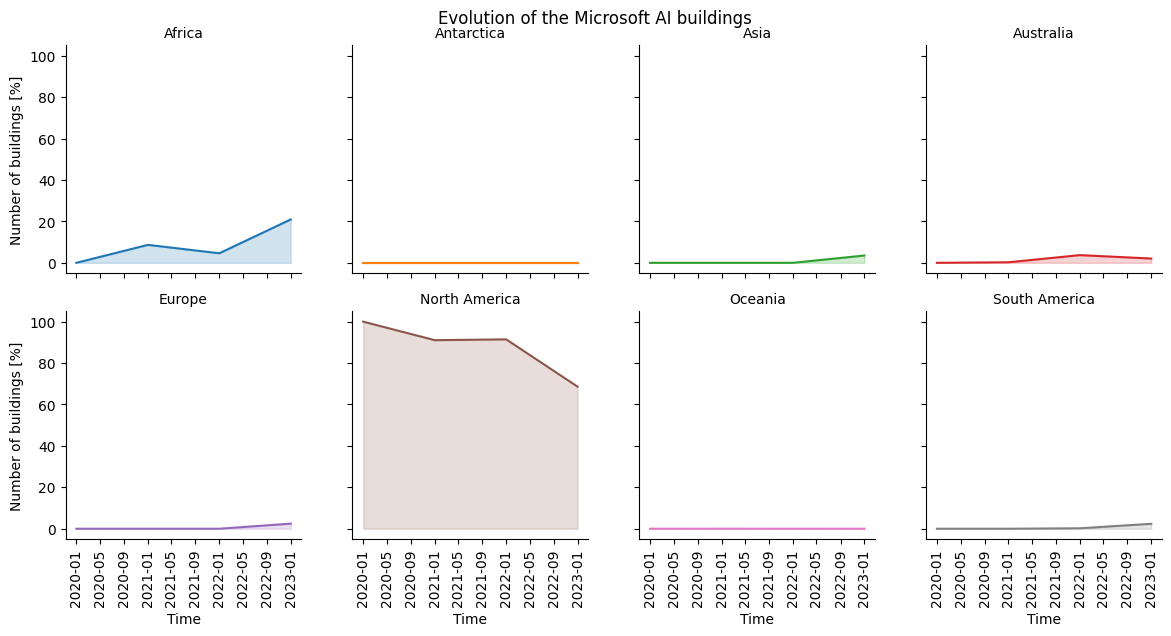

In [46]:
# Create a grid : initialize it
g = sns.FacetGrid(df_ai, col='continent', hue='continent', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'timestamp', 'percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'timestamp', 'percentage',
          alpha=0.2)  # .set_titles("{col_name}")

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# Set subtitles using the get_subtitle function
g.set_titles("{col_name}")


# Control the title of each facet
# g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

axes = g.axes.flatten()


for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of buildings [%]")
    # ax.set_ylim(100)


# Show the graph
plt.show()


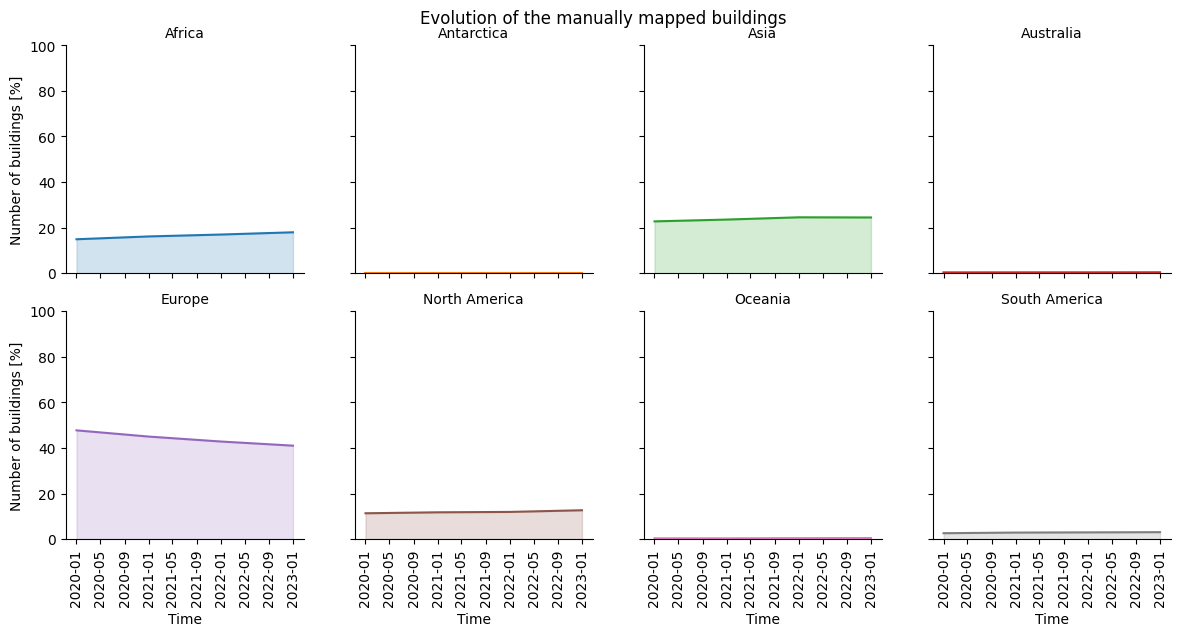

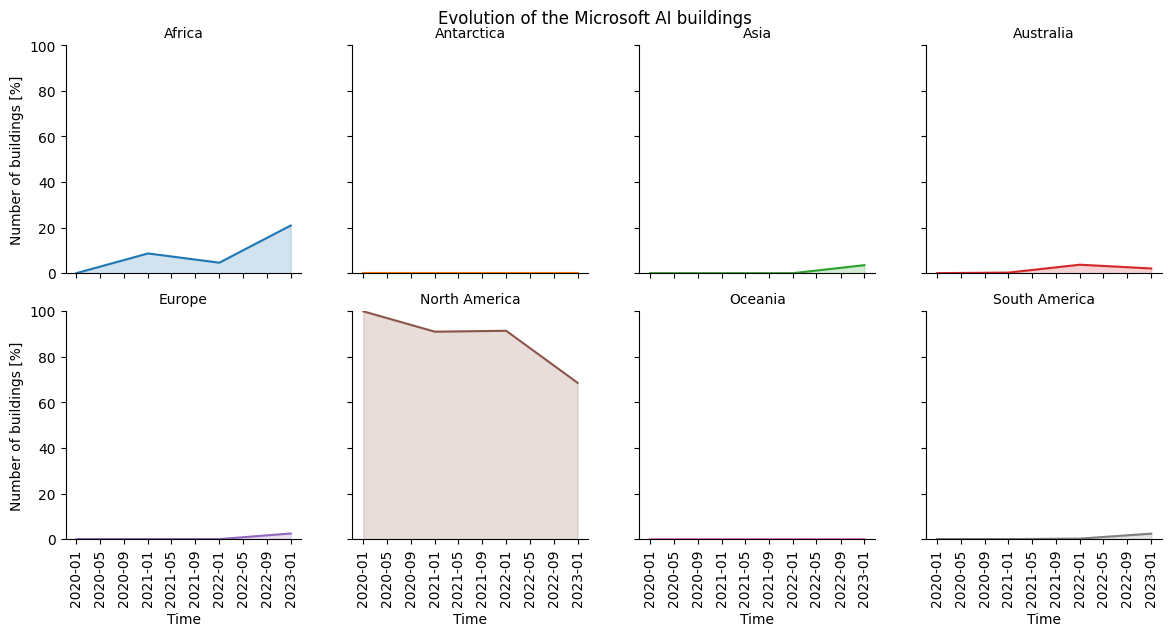

In [49]:

# Create a grid : initialize it
g = sns.FacetGrid(df_rem, col='continent', hue='continent', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'timestamp', 'percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'timestamp', 'percentage',
          alpha=0.2)#.set_titles("{col_name}")

g.set(ylim=(0, 100))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# Set subtitles using the get_subtitle function
g.set_titles("{col_name}")


# Control the title of each facet
# g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the manually mapped buildings')

axes = g.axes.flatten()


for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of buildings [%]")
    # ax.set_ylim(100)


# Show the graph
plt.show()


# Create a grid : initialize it
g = sns.FacetGrid(df_ai, col='continent', hue='continent', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'timestamp', 'percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'timestamp', 'percentage',
          alpha=0.2)  # .set_titles("{col_name}")

g.set(ylim=(0,100))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# Set subtitles using the get_subtitle function
g.set_titles("{col_name}")


# Control the title of each facet
# g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

axes = g.axes.flatten()


for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of buildings [%]")


# Show the graph
plt.show()
